In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from lightcurvelynx.models import bagle_models
from lightcurvelynx.simulate import simulate_lightcurves
from lightcurvelynx.utils.plotting import plot_lightcurves

In [65]:
with open("bagle_model_names_and_param_dicts.pkl", "rb") as f:
        loaded_data_list = pickle.load(f)

In [67]:
multi_filt_sample = np.array(loaded_data_list)[np.array([50, 113, 122, 199, 235, 280, 298, 315, 317, 328, 381, 403, 511, 513, 516, 586, 709, 803])]

In [68]:
ref_time = 63000

In [69]:
for i in range(len(multi_filt_sample)):
    for name in ['mag_src', 'b_sff', 'dmag_Lp_Ls', 'mag_src_pri', 'mag_src_sec']:
        if name in multi_filt_sample[i][1].keys():
            multi_filt_sample[i][1][name] = multi_filt_sample[i][1][name]*6
    for t0 in ['t0', 't0_p']:
        if t0 in multi_filt_sample[i][1].keys():
            multi_filt_sample[i][1][t0] += ref_time

In [71]:
model_list, param_dicts = zip(*multi_filt_sample)
model_list = list(model_list)
param_dicts = list(param_dicts)

In [72]:
model = bagle_models.BagleMultiWrapperModel(
        model_list,
        param_dicts,
        in_order=True,
        node_label="model",
    )

In [38]:
from lightcurvelynx import _LIGHTCURVELYNX_BASE_DATA_DIR
from lightcurvelynx.astro_utils.passbands import PassbandGroup
from lightcurvelynx.obstable.opsim import OpSim

opsim_db = OpSim.from_db('/u/nsabrams/work/rubin/OpSim/baseline_v5.0.0_10yrs.db') # replace this with your desired directory and OpSim

table_dir = '/u/nsabrams/work/rubin/' # replace this with your desired directory
passband_group = PassbandGroup.from_preset(
    preset="LSST",
    units="nm",
    trim_quantile=0.001,
    delta_wave=1,
    table_dir=table_dir,
)

In [73]:
lightcurves = simulate_lightcurves(
    model,
    len(model_list),
    opsim_db,
    passband_group,
)

Simulating:  61%|███████████████████████████████████████████████████████████████████████████████▍                                                  | 11/18 [00:00<00:00, 41.54obj/s]/u/nsabrams/code/BAGLE_Microlensing/src/bagle/model.py:16741: RuntimeWarning: invalid value encountered in divide
  dwbardz = self.m1 / (z_arr - z1[:, np.newaxis, np.newaxis]) ** 2
/u/nsabrams/code/BAGLE_Microlensing/src/bagle/model.py:16742: RuntimeWarning: invalid value encountered in divide
  dwbardz += self.m2 / (z_arr - z2[:, np.newaxis, np.newaxis]) ** 2
/u/nsabrams/code/BAGLE_Microlensing/src/bagle/model.py:16741: RuntimeWarning: invalid value encountered in divide
  dwbardz = self.m1 / (z_arr - z1[:, np.newaxis, np.newaxis]) ** 2
/u/nsabrams/code/BAGLE_Microlensing/src/bagle/model.py:16742: RuntimeWarning: invalid value encountered in divide
  dwbardz += self.m2 / (z_arr - z2[:, np.newaxis, np.newaxis]) ** 2
/u/nsabrams/code/BAGLE_Microlensing/src/bagle/model.py:16741: RuntimeWarning: invalid value en

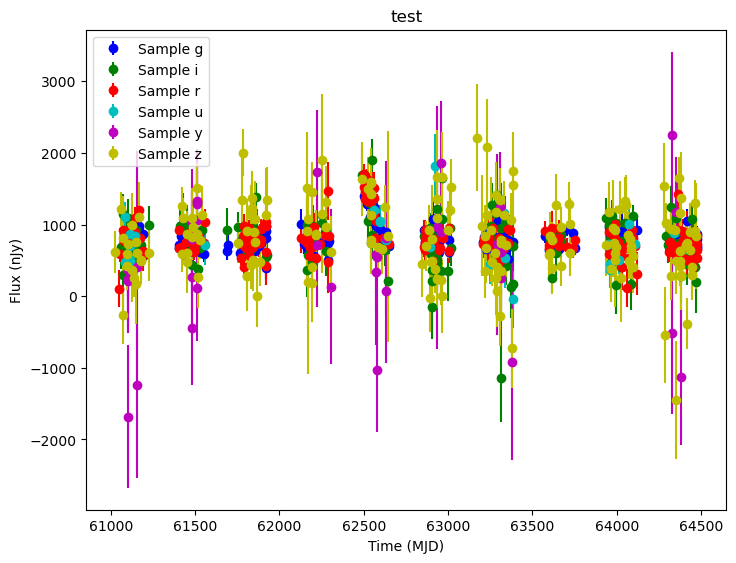

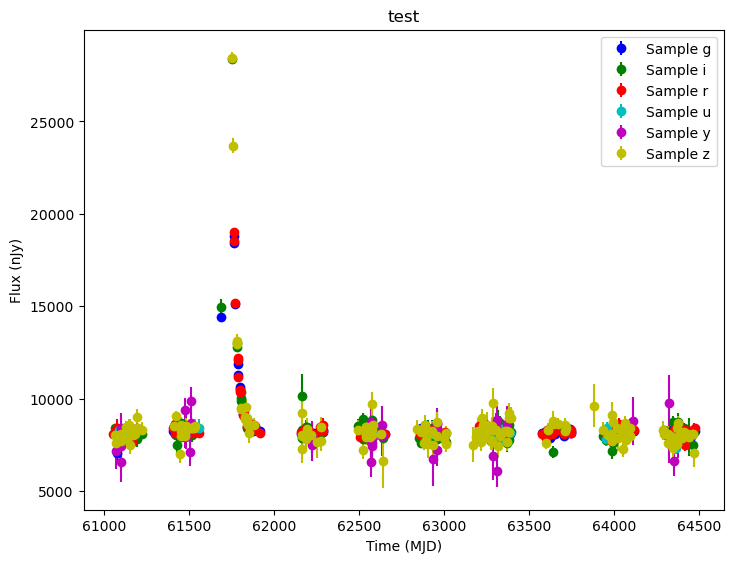

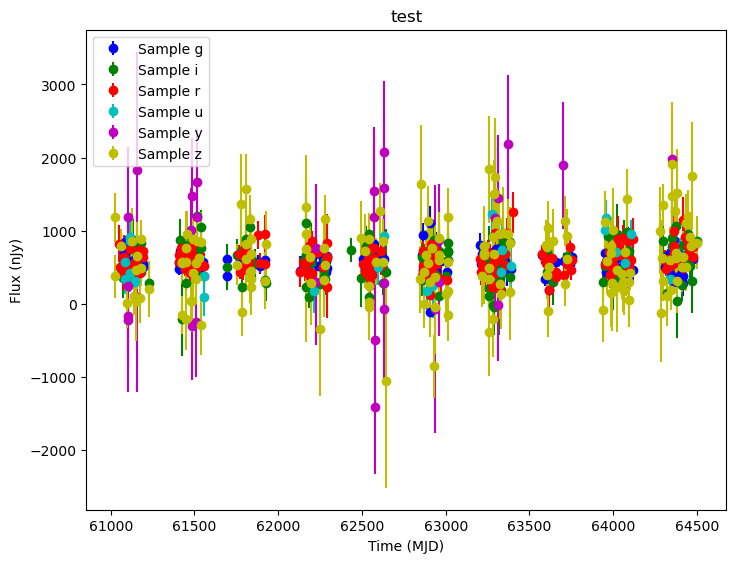

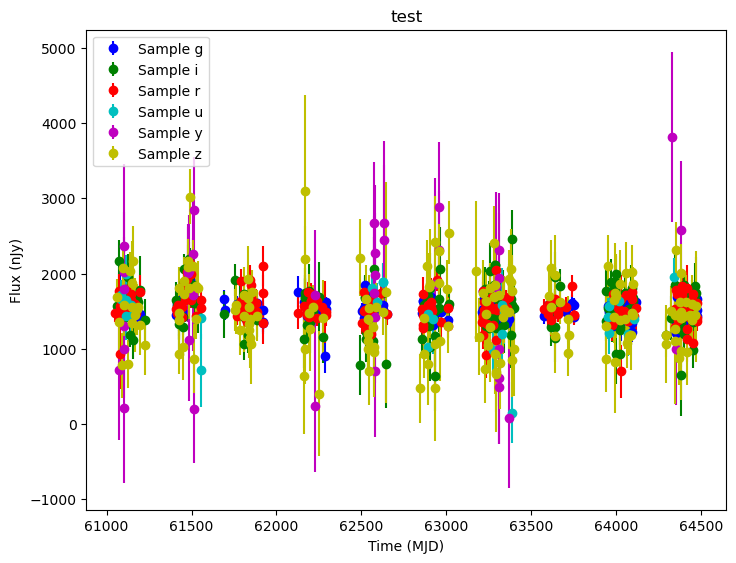

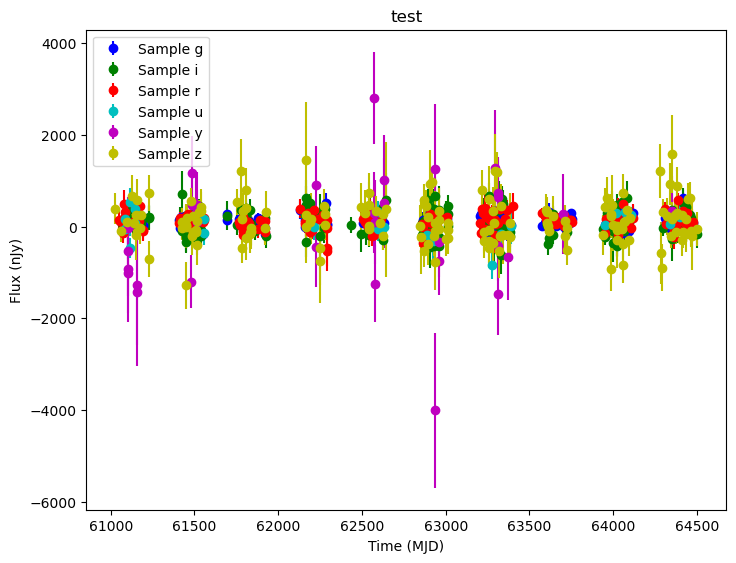

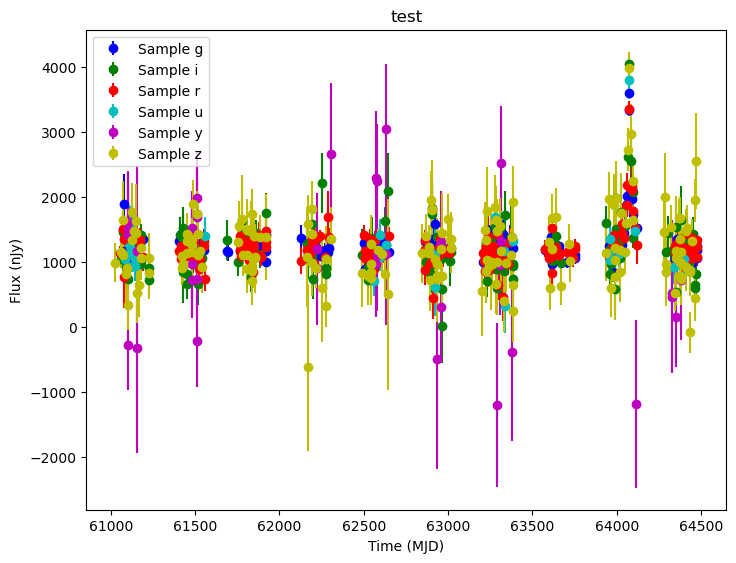

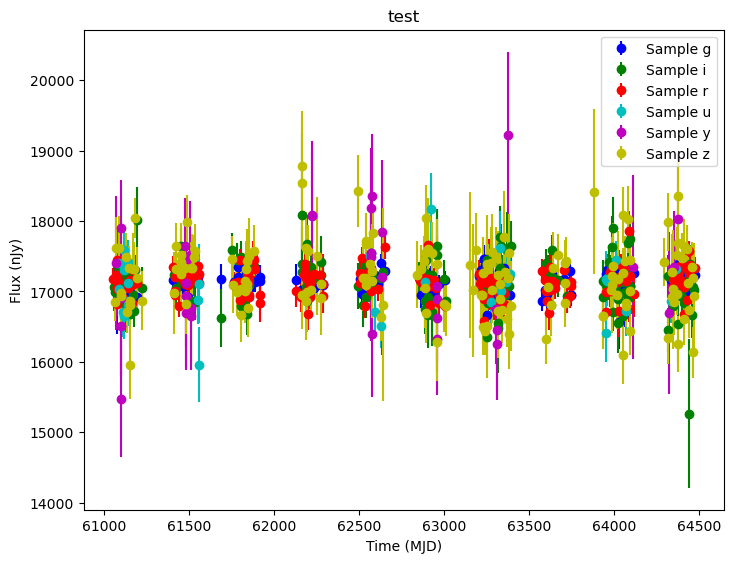

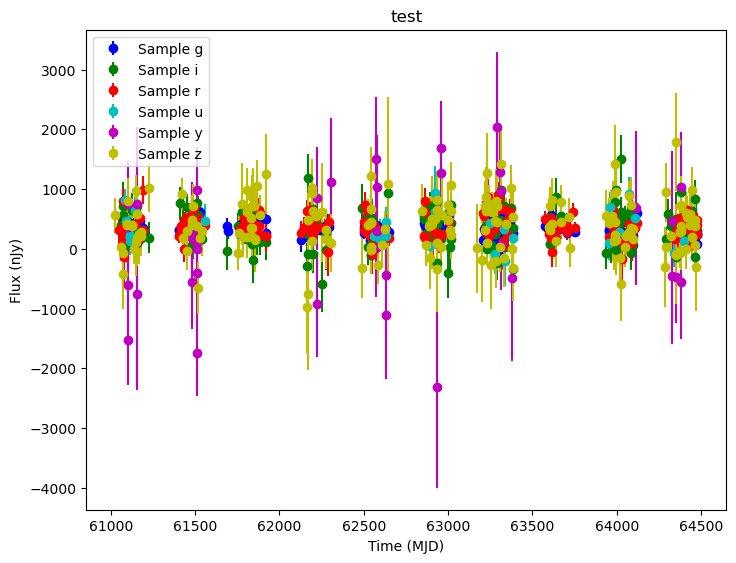

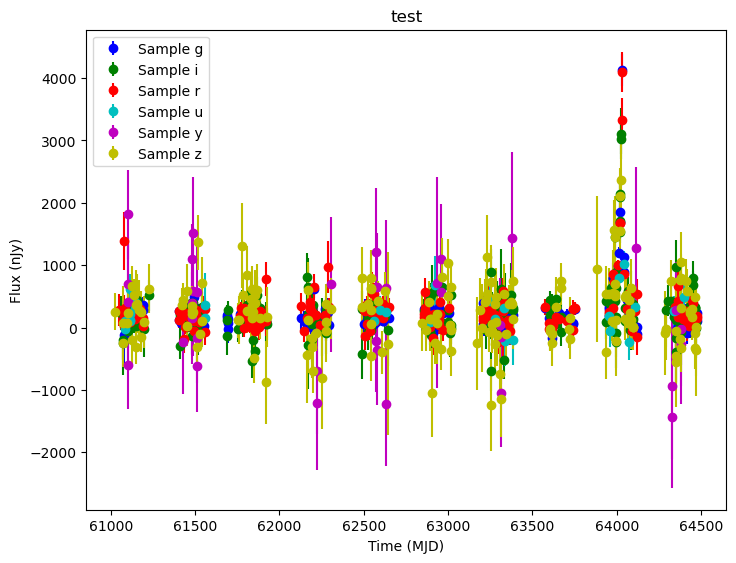

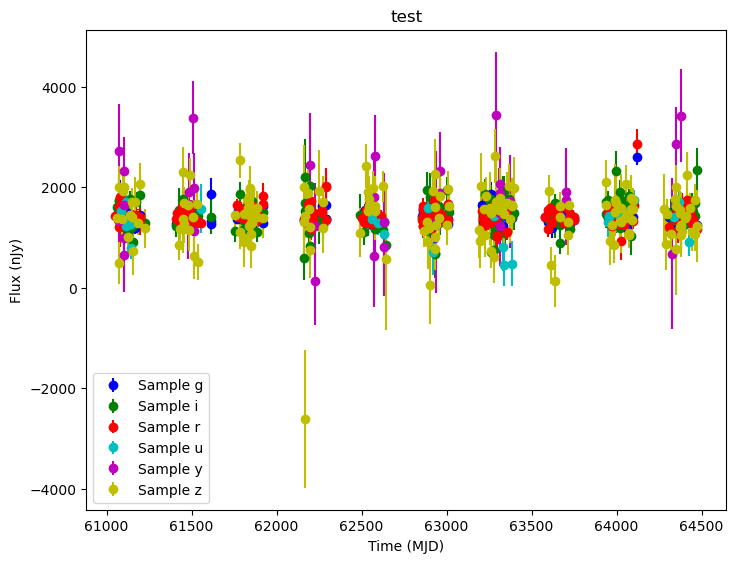

In [74]:
for idx in range(10):
    # Extract the row for this object.
    lc = lightcurves.loc[idx]

    # Plot the lightcurves.
    ax = plot_lightcurves(
        fluxes=np.asarray(lc["lightcurve"]["flux"], dtype=float),
        times=np.asarray(lc["lightcurve"]["mjd"], dtype=float),
        fluxerrs=np.asarray(lc["lightcurve"]["fluxerr"], dtype=float),
        filters=np.asarray(lc["lightcurve"]["filter"], dtype=str),
        title='test',#(f"t0={lc['t0']:.2f}, mL={lc['BagelModel_0_mL']:.2f} " f"beta={lc['BagelModel_0_beta']:.2f}"),
    )
    ax.legend()
    plt.show()